## About Project

In this project, we analyze an employee attrition dataset to predict whether an employee is likely to leave the company. Employee attrition can have significant costs for organizations, including lost productivity, increased recruitment expenses, and decreased morale among remaining employees. Therefore, understanding and predicting employee attrition is crucial for effective workforce management. 

In this analysis, we explore factors contributing to attrition, preprocess the data, select relevant features, train and evaluate machine learning models, and interpret the results to identify key drivers of attrition. Our goal is to provide insights and tools that can help organizations reduce attrition and improve employee satisfaction.

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import libraries](#1)
2. [EDA](#2)
3. [Data Preprocessing](#3)
4. [Feature Selection](#4)
5. [Model Training & Evaluation](#5)
6. [Hyperparameter tuning](#6)
7. [Model Interpretation](#7)
    -  [Gradient Boosting Model](#7.1)
    -  [Logistic Regression Model](#7.2)
7. [Conclusion](#7)




## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import RUSBoostClassifier, EasyEnsembleClassifier


import pandas_profiling as pp

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data_path = '/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Insights:

The dataset contains several columns with information about the employees, such as their age, attrition status (whether they left the company or not), business travel frequency, daily rate, department, distance from home, education level, and many others. The dataset consists of 35 columns.

## 2. EDA <a class="anchor" id="2"></a>
​
[Back to Table of Contents](#0.1)

For the Exploratory Data Analysis (EDA), we will start by performing the following tasks:

1. Summary Statistics: Overview of numerical and categorical variables.
2. Missing Values: Check for missing values.
3. Data Distribution: Visualize the distribution of numerical variables.
4. Categorical Variables: Visualize the distribution of categorical variables.
5. Correlation: Check for correlations among numerical variables.
6. Attrition Analysis: Explore factors affecting employee attrition.

Let's start with the summary statistics of the numerical and categorical variables in the dataset.

In [3]:
# Display the summary statistics for numerical variables
numerical_summary = df.describe()
numerical_summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
# Display the summary statistics for categorical variables
categorical_summary = df.describe(include='object')
categorical_summary

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


We will now check for missing values in the dataset.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
missing_values[missing_values > 0]

Series([], dtype: int64)

There are no missing values in the dataset.


Next, we will visualize the distribution of the numerical variables in the dataset. We will create histograms for some of the numerical variables to better understand their distribution.

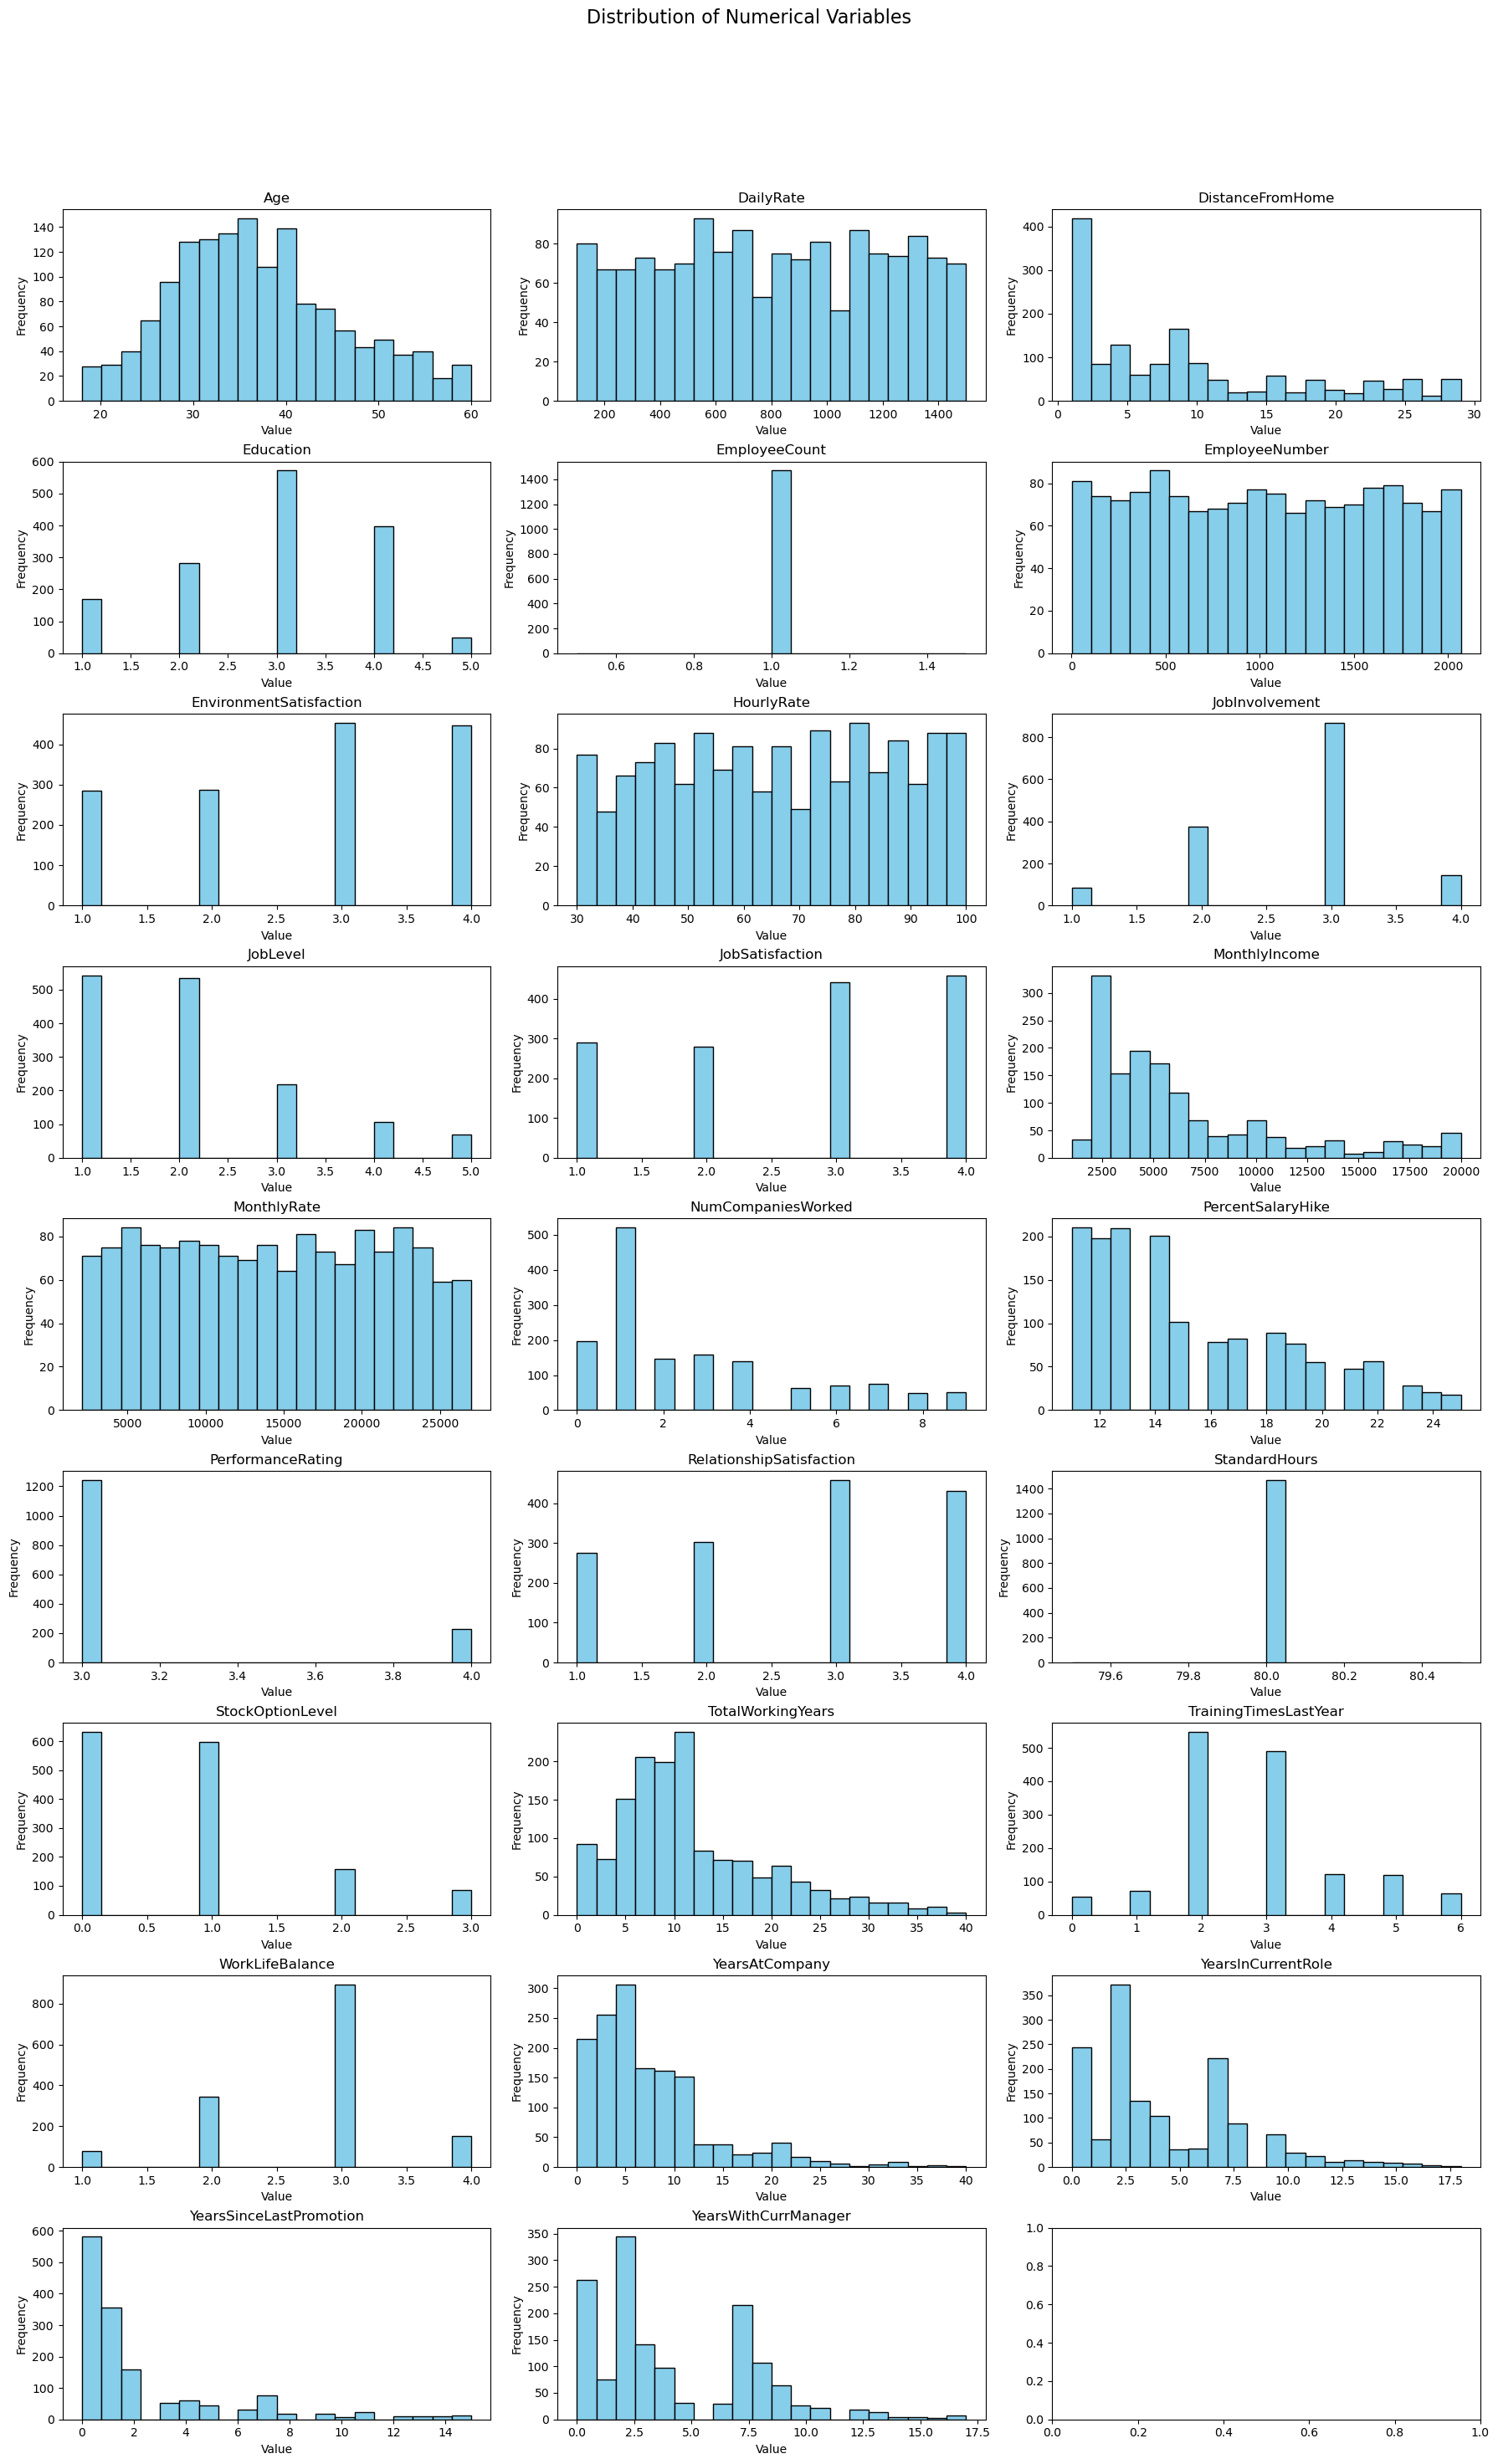

In [7]:
# Select numerical variables for visualization
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create histograms for the selected numerical variables
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(18, 30))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for ax, var in zip(axes.flatten(), numerical_vars):
    ax.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(var)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Insights:
* Age: Most employees are in the age range of 30 to 40 years.
* DailyRate: The distribution of daily rates is relatively uniform, with no significant peaks.
* DistanceFromHome: Most employees live relatively close to their workplace (less than 10 units of distance).
* Education: The majority of employees have an education level of 2 or 3 (College or Bachelor).
* EmployeeCount: All employees have a count of 1.
* EmployeeNumber: The distribution of employee numbers is relatively uniform, with no significant peaks.
* EnvironmentSatisfaction: The distribution of environment satisfaction is relatively uniform across all levels.
* HourlyRate: The distribution of hourly rates is relatively uniform, with no significant peaks.
* JobInvolvement: Most employees have a job involvement level of 2 or 3 (Medium or High).
* JobLevel: Most employees have lower job levels (1 or 2).
* JobSatisfaction: The distribution of job satisfaction is relatively uniform across all levels.
* MonthlyIncome: The majority of employees have a monthly income of less than 5,000 units.
* MonthlyRate: The distribution of monthly rates is relatively uniform, with no significant peaks.
* NumCompaniesWorked: Most employees have worked for 1 or 2 companies.
* PercentSalaryHike: Most employees have received a salary hike of 11% to 15%.
* PerformanceRating: The majority of employees have a performance rating of 3 (Excellent).
* RelationshipSatisfaction: The distribution of relationship satisfaction is relatively uniform across all levels.
* StandardHours: All employees have standard hours of 80.
* StockOptionLevel: Most employees have a stock option level of 0 or 1.
* TotalWorkingYears: Most employees have less than 10 total working years.
* TrainingTimesLastYear: Most employees have received 2 or 3 training sessions in the last year.
* WorkLifeBalance: The majority of employees have a work-life balance level of 2 or 3 (Good or Better).
* YearsAtCompany: Most employees have been at the company for less than 10 years.
* YearsInCurrentRole: Most employees have been in their current role for less than 5 years.
* YearsSinceLastPromotion: Most employees have not been promoted in the last 5 years.
* YearsWithCurrManager: Most employees have been with their current manager for less than 5 years.

Next, we will visualize the distribution of some of the categorical variables in the dataset.

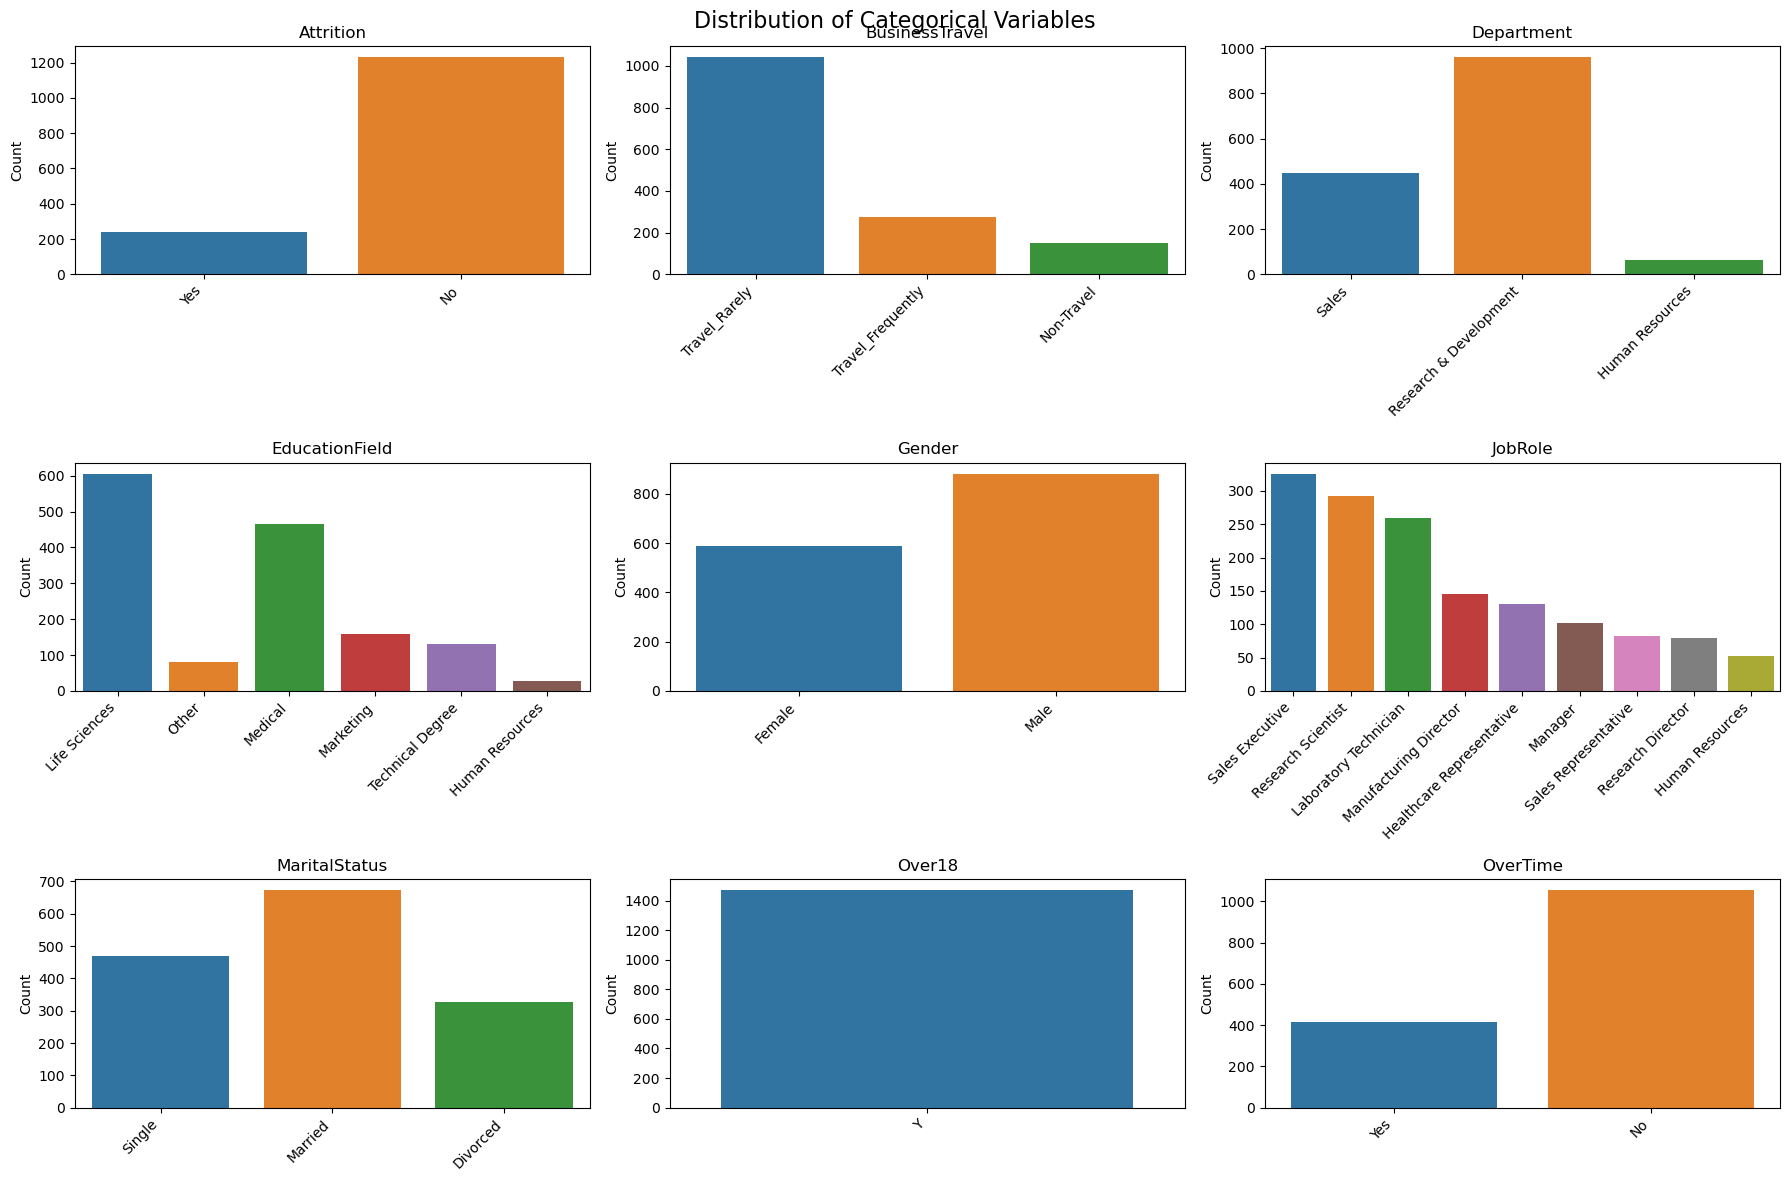

In [8]:
import seaborn as sns

# Select categorical variables for visualization
categorical_vars  = df.select_dtypes(include=['object']).columns.tolist()

# Create bar plots for the selected categorical variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for ax, var in zip(axes.flatten(), categorical_vars):
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove the empty subplots
for ax in axes.flatten()[len(categorical_vars):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Here are the key insights based on the distribution of the categorical variables:

* Attrition: A significant majority of employees do not have attrition (i.e., they did not leave the company).
* BusinessTravel: Most employees travel rarely for business purposes, while a smaller proportion travel frequently. A few employees do not travel at all.
* Department: The majority of employees work in the Research & Development department, followed by Sales. A smaller proportion of employees work in the Human Resources department.
* EducationField: Most employees have a background in Life Sciences or Medical fields, followed by Marketing, Technical Degree, and Other fields. A smaller proportion of employees have a background in Human Resources.
* Gender: There are more male employees than female employees.
* JobRole: Sales Executive, Research Scientist, and Laboratory Technician are the most common job roles. Other job roles, such as Manufacturing Director, Healthcare Representative, Manager, Research Director, and Human Resources, have fewer employees.
* MaritalStatus: The majority of employees are married, followed by Single and Divorced.
* Over18: All employees are over 18 years old.
* OverTime: The majority of employees do not work overtime, while a smaller proportion of employees do work overtime.

Next, we will check for correlations among the numerical variables.

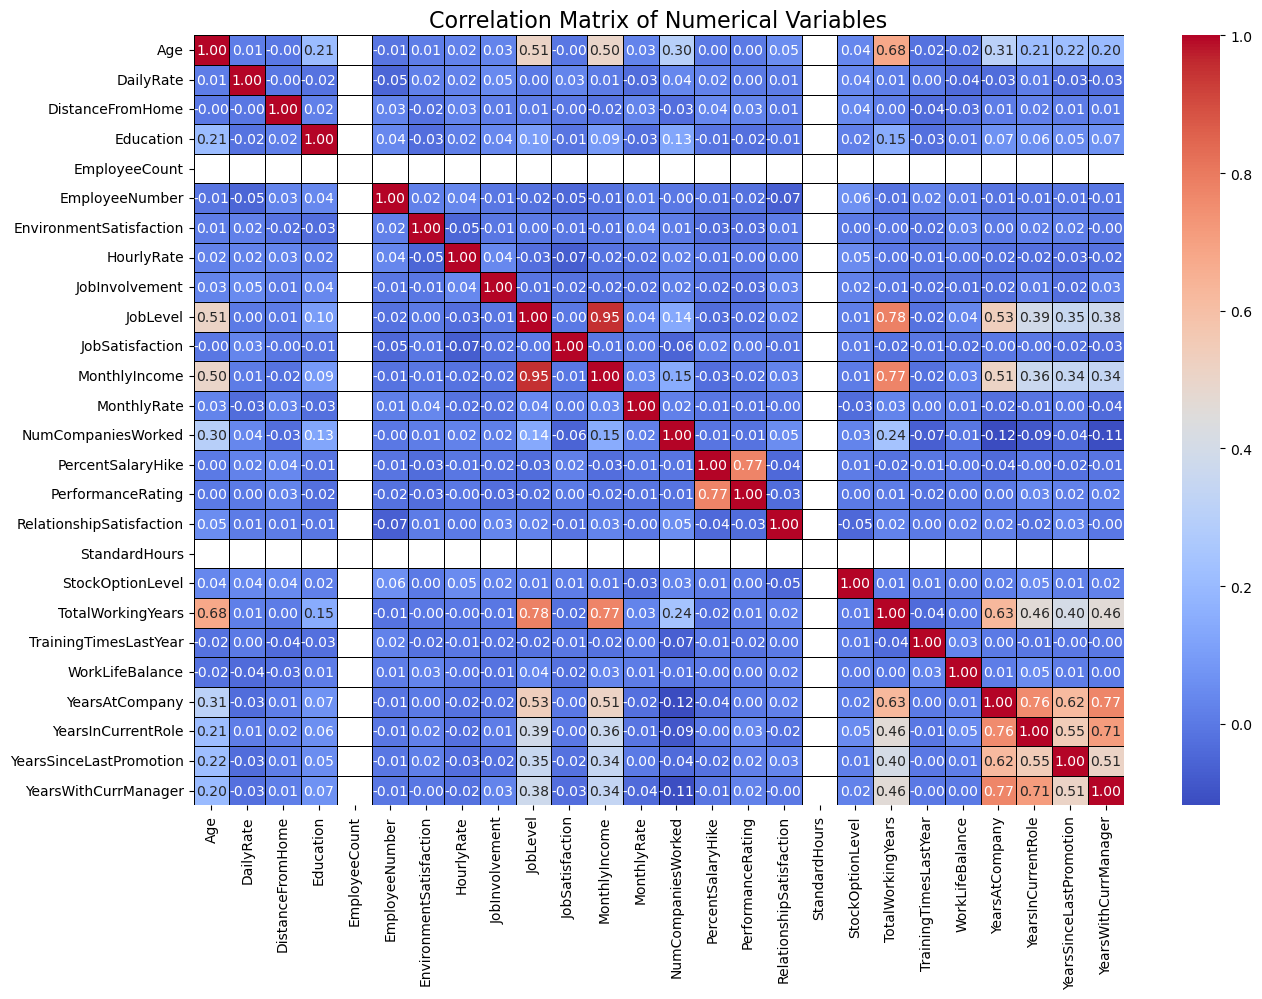

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

Some of the strong correlations observed in the dataset are:

* **JobLevel and MonthlyIncome:** These variables have a strong positive correlation, indicating that higher job levels are associated with higher monthly income.
* **TotalWorkingYears and MonthlyIncome:** These variables have a strong positive correlation, indicating that employees with more total working years tend to have higher monthly income.
* **YearsAtCompany and YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager:** These variables have strong positive correlations, indicating that employees who have been at the company for a longer time tend to have longer tenures in their current roles, longer times since their last promotions, and longer durations with their current managers.


Next, we will explore factors affecting employee attrition.

To explore factors affecting employee attrition, we'll perform the following analysis:

* Compare the distribution of numerical variables for employees with and without attrition.
* Compare the distribution of categorical variables for employees with and without attrition.

Let's start by comparing the distribution of numerical variables for employees with and without attrition. We will create box plots for some of the numerical variables and group them by the "Attrition" variable.

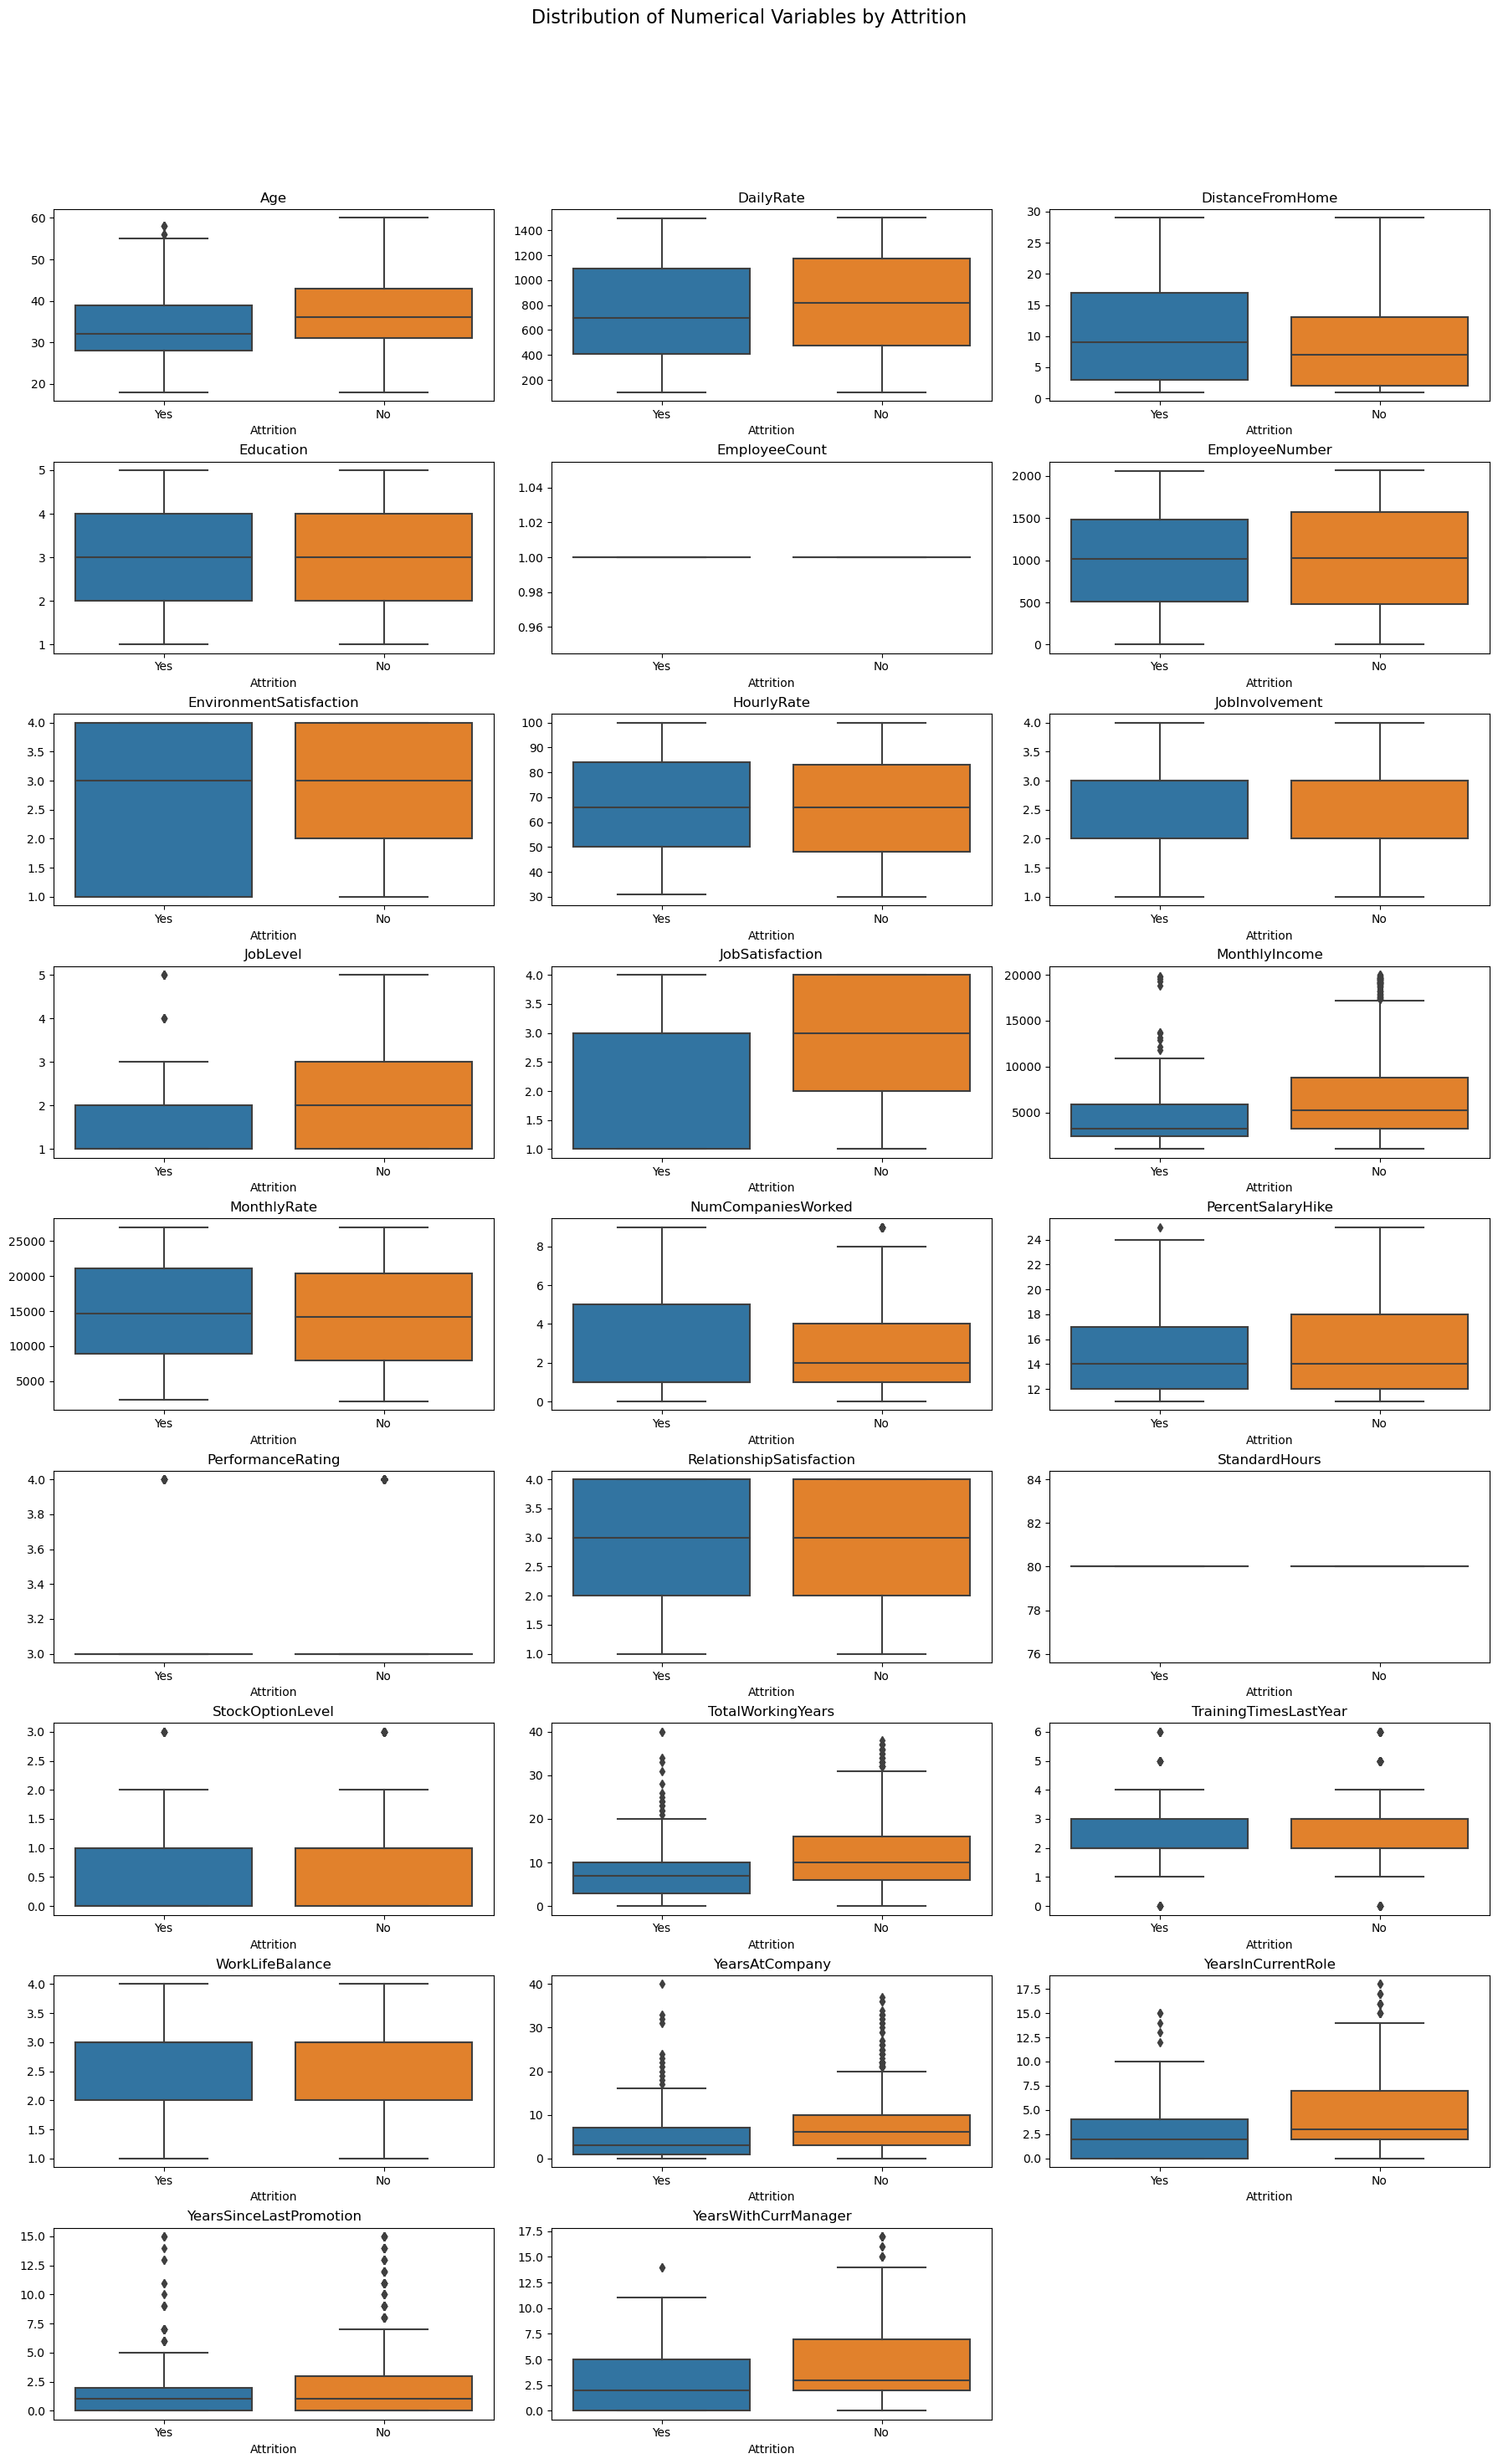

In [10]:
# Select numerical variables for visualization
numerical_vars_to_compare = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create box plots for the selected numerical variables grouped by Attrition
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(18, 30))
fig.suptitle('Distribution of Numerical Variables by Attrition', fontsize=16)

for ax, var in zip(axes.flatten(), numerical_vars_to_compare):
    sns.boxplot(data=df, x='Attrition', y=var, ax=ax)
    ax.set_title(var)
    ax.set_xlabel('Attrition')
    ax.set_ylabel('')

# Remove the empty subplot
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Here are the insights based on the box plots showing the distribution of numerical variables by attrition:

* **Age:** Employees who left the company (attrition) tend to be younger than those who stayed.
* **DailyRate:** The daily rate does not show a significant difference between employees who left and those who stayed.
* **DistanceFromHome:** Employees who left the company tend to live farther from the workplace.
* **Education:** Education level does not show a significant difference between employees who left and those who stayed.
* **EnvironmentSatisfaction:** Employees who left the company tend to have lower environment satisfaction.
* **HourlyRate:** The hourly rate does not show a significant difference between employees who left and those who stayed.
* **JobInvolvement:** Employees who left the company tend to have lower job involvement.
* **JobLevel:** Employees who left the company tend to have lower job levels.
* **JobSatisfaction:** Employees who left the company tend to have lower job satisfaction.
* **MonthlyIncome:** Employees who left the company tend to have lower monthly income.
* **MonthlyRate:** The monthly rate does not show a significant difference between employees who left and those who stayed.
* **NumCompaniesWorked:** Employees who left the company tend to have worked for more companies.
* **PercentSalaryHike:** The percent salary hike does not show a significant difference between employees who left and those who stayed.
* **PerformanceRating:** The performance rating does not show a significant difference between employees who left and those who stayed.
* **RelationshipSatisfaction:** Employees who left the company tend to have lower relationship satisfaction.
* **StockOptionLevel:** Employees who left the company tend to have lower stock option levels.
* **TotalWorkingYears:** Employees who left the company tend to have fewer total working years.
* **TrainingTimesLastYear:** Employees who left the company tend to have received fewer training sessions in the last year.
* **WorkLifeBalance:** Employees who left the company tend to have lower work-life balance.
* **YearsAtCompany:** Employees who left the company tend to have fewer years at the company.
* **YearsInCurrentRole:** Employees who left the company tend to have fewer years in their current role.
* **YearsSinceLastPromotion:** Employees who left the company tend to have fewer years since their last promotion.
* **YearsWithCurrManager:** Employees who left the company tend to have fewer years with their current manager.

Next, let's compare the distribution of categorical variables for employees with and without attrition. We will create count plots for some of the categorical variables and group them by the "Attrition" variable.

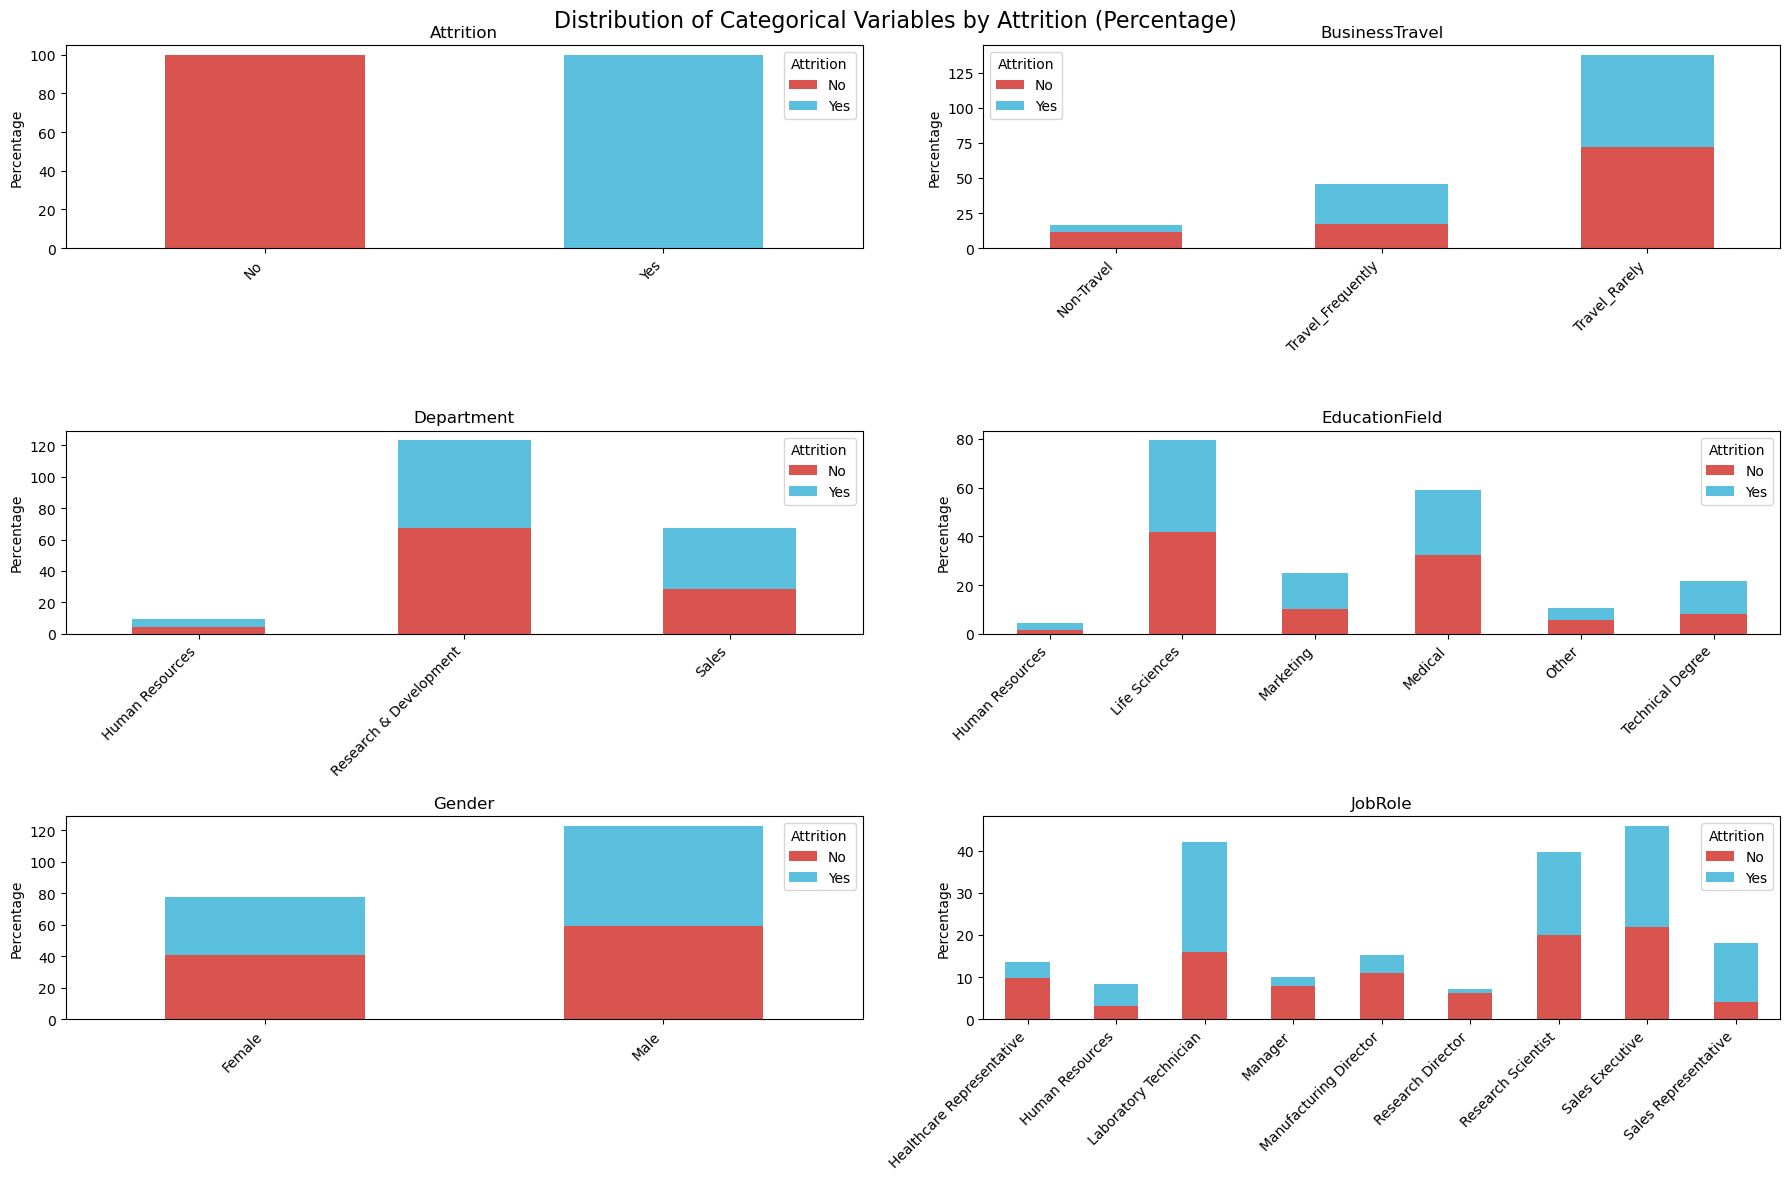

In [11]:
# Select categorical variables for comparison
categorical_vars_to_compare = df.select_dtypes(include=['object']).columns.tolist()

# Create count plots for the selected categorical variables grouped by Attrition with percentage on the y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.suptitle('Distribution of Categorical Variables by Attrition (Percentage)', fontsize=16)

for ax, var in zip(axes.flatten(), categorical_vars_to_compare):
    # Calculate the percentage of each category within each group
    counts = df.groupby(['Attrition', var]).size().unstack()
    percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
    
    # Plot the percentages
    percentages.T.plot(kind='bar', stacked=True, ax=ax, color=['#d9534f', '#5bc0de'])
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Here are the stacked bar plots showing the distribution of categorical variables by attrition, with the percentage on the y-axis:

* **BusinessTravel:** Employees who travel frequently for business purposes have a higher percentage of attrition compared to those who travel rarely or not at all.
* **Department:** The Sales and Human Resources departments have a higher percentage of attrition compared to the Research & Development department.
* **EducationField:** Employees with a background in Human Resources or Technical Degree have a higher percentage of attrition compared to other fields.
* **Gender:** Male employees have a slightly higher percentage of attrition compared to female employees.
* **JobRole:** Sales Representatives, Laboratory Technicians, and Human Resources roles have a higher percentage of attrition compared to other roles.
* **MaritalStatus:** Single employees have a higher percentage of attrition compared to married or divorced employees.


## 3. Data Preprocessing <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

The data processing steps include:

* Dropping features that provide no information (EmployeeCount, EmployeeNumber, Over18, StandardHours).
* Removing the target variable 'Attrition' from the list of categorical features.
* Standardizing numerical features using StandardScaler.
* One-hot encoding categorical features using OneHotEncoder with the 'drop' parameter set to 'first' to avoid multicollinearity.
* Combining the preprocessing pipelines for numerical and categorical features using ColumnTransformer.
* Applying the preprocessing pipeline to the data.
* Mapping the target variable 'Attrition' to a binary format (Yes: 1, No: 0).

In [12]:
# Drop features that provide no information
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from categorical features
categorical_features.remove('Attrition')

# Define the preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine the preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing pipeline to the data
X = preprocessor.fit_transform(df.drop(columns=['Attrition']))
y = df['Attrition'].map({'Yes': 1, 'No': 0}).values

# Convert the processed data to a DataFrame for inspection
processed_df = pd.DataFrame(X)
processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 4. Feature Selection <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [13]:
# Apply ANOVA F-statistic for numerical features
anova_selector = SelectKBest(score_func=f_classif, k='all')
X_numerical = preprocessor.transformers_[0][1].fit_transform(df[numerical_features])
anova_selector.fit(X_numerical, y)

# Apply chi-squared test for categorical features
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_categorical = preprocessor.transformers_[1][1].fit_transform(df[categorical_features])
chi2_selector.fit(X_categorical, y)

# Calculate feature importance scores using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)
rfe.fit(X, y)

# Get the feature names after one-hot encoding
encoded_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine the numerical and encoded categorical feature names
all_features = numerical_features + encoded_features.tolist()

# Update the feature scores DataFrame
feature_scores = pd.DataFrame({
    'Features': all_features,
    'ANOVA F-statistic': list(anova_selector.scores_) + ['N/A'] * len(encoded_features),
    'Chi-Squared Test': ['N/A'] * len(numerical_features) + list(chi2_selector.scores_),
    'Feature Importances': feature_importances,
    'RFE Support': rfe.support_,
    'RFE Ranking': rfe.ranking_
})

#feature_scores.sort_values(by='Feature Importances', ascending=False)


In [14]:
# ANOVA F-statistic for numerical features
anova_scores = pd.DataFrame({
    'Numerical Features': numerical_features,
    'ANOVA F-statistic': anova_selector.scores_
})
anova_scores = anova_scores.sort_values(by='ANOVA F-statistic', ascending=False)
anova_scores

,Numerical Features,ANOVA F-statistic
16,TotalWorkingYears,44.252491
7,JobLevel,43.215344
20,YearsInCurrentRole,38.838303
9,MonthlyIncome,38.488819
0,Age,38.175887
22,YearsWithCurrManager,36.712311
15,StockOptionLevel,28.140501
19,YearsAtCompany,27.001624
6,JobInvolvement,25.241985
8,JobSatisfaction,15.890004


ANOVA F-statistic (for numerical features):

Features like 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'JobLevel', 'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager' have high F-statistic scores, indicating that they are statistically significant.

In [15]:
# Chi-Squared Test for categorical features
chi2_scores = pd.DataFrame({
    'Categorical Features': encoded_features,
    'Chi-Squared Test': chi2_selector.scores_
})
chi2_scores = chi2_scores.sort_values(by='Chi-Squared Test', ascending=False)
chi2_scores

,Categorical Features,Chi-Squared Test
20,OverTime_Yes,63.845067
17,JobRole_Sales Representative,34.290268
19,MaritalStatus_Single,30.771669
0,BusinessTravel_Travel_Frequently,15.816623
11,JobRole_Laboratory Technician,11.699495
14,JobRole_Research Director,10.978010
12,JobRole_Manager,9.496136
13,JobRole_Manufacturing Director,9.126589
3,Department_Sales,6.694465
18,MaritalStatus_Married,6.597586


Chi-Squared Test (for categorical features):

Features like 'OverTime_Yes', 'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'Department_Sales' have high chi-squared test scores, indicating that they are statistically significant.

In [16]:
# Feature Importance Scores from Random Forest
feature_importance_scores = pd.DataFrame({
    'Features': all_features,
    'Feature Importances': feature_importances
})
feature_importance_scores = feature_importance_scores.sort_values(by='Feature Importances', ascending=False)
feature_importance_scores

,Features,Feature Importances
9,MonthlyIncome,0.072600
0,Age,0.060495
1,DailyRate,0.054831
43,OverTime_Yes,0.050067
16,TotalWorkingYears,0.048431
2,DistanceFromHome,0.046774
10,MonthlyRate,0.044826
19,YearsAtCompany,0.043154
5,HourlyRate,0.042656
12,PercentSalaryHike,0.033769


Feature Importance Scores (from Random Forest):

Features like 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'JobLevel', 'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager' have high feature importance scores, indicating that they are important for the classification task.

In [17]:
# Recursive Feature Elimination (RFE)
rfe_scores = pd.DataFrame({
    'Features': all_features,
    'RFE Support': rfe.support_,
    'RFE Ranking': rfe.ranking_
})
rfe_scores = rfe_scores.sort_values(by='RFE Ranking')

rfe_scores

,Features,RFE Support,RFE Ranking
0,Age,True,1
22,YearsWithCurrManager,True,1
19,YearsAtCompany,True,1
17,TrainingTimesLastYear,True,1
16,TotalWorkingYears,True,1
15,StockOptionLevel,True,1
12,PercentSalaryHike,True,1
11,NumCompaniesWorked,True,1
10,MonthlyRate,True,1
43,OverTime_Yes,True,1


Recursive Feature Elimination (RFE):

The RFE method has selected 15 features (marked with 'True' in the 'RFE Support' column) as the most relevant features. The 'RFE Ranking' column shows the ranking of the features, with 1 being the highest rank.

### Selection Criteria
To select the features to be used for the machine learning model, we'll consider the following criteria:

1. Features with high ANOVA F-statistic scores (for numerical features) or high chi-squared test scores (for categorical features).
2. Features with high feature importance scores (from Random Forest).
3. Features selected by the Recursive Feature Elimination (RFE) method.

We'll select the features that satisfy at least two of the above criteria. After selecting the features, we'll also remove features that are highly correlated with each other to avoid multicollinearity.

Let's start by selecting the features based on the above criteria.


In [18]:
# Select features based on ANOVA F-statistic, chi-squared test, feature importance scores, and RFE
selected_features = set()

# Select features with high ANOVA F-statistic scores
selected_features.update(anova_scores[anova_scores['ANOVA F-statistic'] > 10]['Numerical Features'])

# Select features with high chi-squared test scores
selected_features.update(chi2_scores[chi2_scores['Chi-Squared Test'] > 10]['Categorical Features'])

# Select features with high feature importance scores
selected_features.update(feature_importance_scores[feature_importance_scores['Feature Importances'] > 0.03]['Features'])

# Select features selected by RFE
selected_features.update(rfe_scores[rfe_scores['RFE Support']]['Features'])

# Convert the set of selected features to a list
selected_features = list(selected_features)

# Create a DataFrame with only the selected features
selected_df = pd.DataFrame(X, columns=all_features)[selected_features]

# Remove features that are highly correlated with each other
correlation_matrix = selected_df.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Remove the highly correlated features
for feature in highly_correlated_features:
    if feature in selected_features:
        selected_features.remove(feature)

selected_features

['HourlyRate',
 'JobLevel',
 'DailyRate',
 'MonthlyRate',
 'JobRole_Research Director',
 'DistanceFromHome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'JobSatisfaction',
 'BusinessTravel_Travel_Frequently',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'YearsWithCurrManager',
 'TrainingTimesLastYear',
 'MaritalStatus_Single',
 'JobInvolvement',
 'NumCompaniesWorked',
 'YearsInCurrentRole',
 'JobRole_Laboratory Technician',
 'Age',
 'PercentSalaryHike',
 'OverTime_Yes',
 'JobRole_Sales Representative']

## 5. Model Training & Evaluation<a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

In [19]:
# Split the data into training and testing sets
X_selected = selected_df[selected_features].values
# Split the data into training and testing sets using stratify
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 23), (294, 23), (1176,), (294,))

Since we are dealing with a imbalanced dataset, we increase the number of instances in the minority class by randomly replicating them or by generating synthetic instances using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

In [20]:
# Define the SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
#from sklearn.model_selection import cross_validate, StratifiedKFold
#from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary to store the cross-validation metrics of the algorithms
cv_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Define a function to train and evaluate each algorithm
def train_and_evaluate_model(model, model_name, X_train, y_train):
    # Define the scoring metrics
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
               'f1': make_scorer(f1_score)}

    # Perform cross-validation using StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)
    
    # Store the cross-validation metrics
    cv_metrics['Model'].append(model_name)
    cv_metrics['Accuracy'].append(scores['test_accuracy'].mean())
    cv_metrics['Precision'].append(scores['test_precision'].mean())
    cv_metrics['Recall'].append(scores['test_recall'].mean())
    cv_metrics['F1-Score'].append(scores['test_f1'].mean())
    print(f"{model_name}: Cross-validation metrics calculated")
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model

# Define a function to evaluate the model on the test set and store the metrics
def evaluate_on_test_set(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_pred))
    test_metrics['F1-Score'].append(f1_score(y_test, y_pred))
    print(f"{model_name}: Test metrics calculated")


# Train and evaluate each algorithm
models = [
    (LogisticRegression(random_state=42), "Logistic Regression"),
    (SVC(random_state=42), "Support Vector Machines"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (MLPClassifier(random_state=42), "Neural Networks"),
    (GaussianNB(), "Naive Bayes"),
    (AdaBoostClassifier(random_state=42), "AdaBoost"),
    (XGBClassifier(random_state=42), "XGBoost"),
    (LGBMClassifier(random_state=42), "LightGBM"),
    (CatBoostClassifier(random_state=42, verbose=0), "CatBoost")
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)

# Convert the dictionary of cross-validation metrics to a DataFrame
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)


Logistic Regression: Cross-validation metrics calculated
Logistic Regression: Test metrics calculated
Support Vector Machines: Cross-validation metrics calculated
Support Vector Machines: Test metrics calculated
K-Nearest Neighbors: Cross-validation metrics calculated
K-Nearest Neighbors: Test metrics calculated
Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
Random Forest: Cross-validation metrics calculated
Random Forest: Test metrics calculated
Gradient Boosting: Cross-validation metrics calculated
Gradient Boosting: Test metrics calculated
Neural Networks: Cross-validation metrics calculated
Neural Networks: Test metrics calculated
Naive Bayes: Cross-validation metrics calculated
Naive Bayes: Test metrics calculated
AdaBoost: Cross-validation metrics calculated
AdaBoost: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated
LightGBM: Cross-validation metrics calculated
LightGBM: Test metrics

Now, lets try RUSBoost and EasyEnsemble which are known to handle imbalanced datasets and give better performance

In [23]:
X_train_imblanced, X_test_imblanced, y_train_imbalanced, y_test_imblanced = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate RUSBoost
rusboost = RUSBoostClassifier(random_state=42)
fitted_model = train_and_evaluate_model(rusboost, "RUSBoost", X_train_imblanced, y_train_imbalanced)
evaluate_on_test_set(fitted_model, "RUSBoost", X_test_imblanced, y_test_imblanced)

# Train and evaluate EasyEnsemble
easyensemble = EasyEnsembleClassifier(random_state=42)
fitted_model = train_and_evaluate_model(easyensemble, "EasyEnsemble", X_train_imblanced, y_train_imbalanced)
evaluate_on_test_set(fitted_model, "EasyEnsemble", X_test_imblanced, y_test_imblanced)

# Convert the dictionary of cross-validation metrics to a DataFrame
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

RUSBoost: Cross-validation metrics calculated
RUSBoost: Test metrics calculated
EasyEnsemble: Cross-validation metrics calculated
EasyEnsemble: Test metrics calculated

Cross-validation Metrics:
                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.767748   0.767530  0.768764  0.767805
1   Support Vector Machines  0.879821   0.865720  0.900631  0.882166
2       K-Nearest Neighbors  0.807829   0.729026  0.984777  0.837277
3            Decision Trees  0.853960   0.837995  0.878332  0.857324
4             Random Forest  0.928500   0.955116  0.899621  0.926294
5         Gradient Boosting  0.919373   0.948362  0.887443  0.916722
6           Neural Networks  0.913289   0.882354  0.954387  0.916805
7               Naive Bayes  0.665293   0.626220  0.820505  0.710100
8                  AdaBoost  0.900102   0.899872  0.900636  0.900196
9                   XGBoost  0.926976   0.948918  0.902651  0.925021
10                 LightGBM  0.922413   0.9514

## 6. Hyperparameter tuning <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

In [28]:
# Define the hyperparameter search space for each algorithm
param_distributions = {
    'GradientBoosting': {
        'n_estimators': randint(50, 300),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'subsample': uniform(0.7, 0.3)
    },
    'LogisticRegression': {
        'C': uniform(0.01, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
}

# Define the models
models = {
    'GradientBoosting': GradientBoostingClassifier(random_state=13),
    'LogisticRegression': LogisticRegression(random_state=13),
}

# Define a dictionary to store the best hyperparameters for each model
best_params = {}

# Perform hyperparameter tuning for each algorithm
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    random_search = RandomizedSearchCV(
        model, 
        param_distributions=param_distributions[model_name],
        n_iter=50,
        scoring='f1',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_params[model_name] = random_search.best_params_

best_params

Tuning GradientBoosting...
Tuning LogisticRegression...


{'GradientBoosting': {'learning_rate': 0.21756855930780797,
  'max_depth': 9,
  'min_samples_leaf': 9,
  'min_samples_split': 5,
  'n_estimators': 210,
  'subsample': 0.7054226090846563},
 'LogisticRegression': {'C': 0.2641912674409519,
  'penalty': 'l1',
  'solver': 'liblinear'}}

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the models with the best hyperparameters
models = {
    'GradientBoosting': GradientBoostingClassifier(
        learning_rate=0.21756855930780797,
        max_depth=9,
        min_samples_leaf=9,
        min_samples_split=5,
        n_estimators=210,
        subsample=0.7054226090846563,
        random_state=42
    ),
    'LogisticRegression': LogisticRegression(
        C=0.2641912674409519,
        penalty='l1',
        solver='liblinear',
        random_state=42
    )
}

# Define a dictionary to store the test metrics for each model
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate the models on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_pred))
    test_metrics['F1-Score'].append(f1_score(y_test, y_pred))

# Convert the dictionary of test metrics to a DataFrame
test_metrics_df = pd.DataFrame(test_metrics)
test_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,GradientBoosting,0.853741,0.590909,0.276596,0.376812
1,LogisticRegression,0.765306,0.372093,0.680851,0.481203


Based on the results, it appears that the Logistic Regression model has better recall, but worse accuracy and precision than the Gradient Boosting model. The F1-score, which is the harmonic mean of precision and recall, is also higher for the Logistic Regression model. This indicates that the Logistic Regression model is more balanced in terms of precision and recall, whereas the Gradient Boosting model has higher accuracy but lower recall.

In a business context, the choice of the best model depends on the specific goals of the project. If the goal is to minimize false positives (incorrectly predicting that an employee will leave), then the Gradient Boosting model may be preferred due to its higher precision. However, if the goal is to identify as many employees as possible who are likely to leave, then the Logistic Regression model may be preferred due to its higher recall.

In this case, since the dataset is imbalanced with a higher proportion of employees who did not leave, it is important to consider the recall and F1-score in addition to accuracy. The Logistic Regression model, which has a higher recall and F1-score, may be a better choice for identifying employees who are likely to leave. However, it is important to consider the business context and the potential costs of false positives and false negatives when making a decision.


## 7. Model Interpretation <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

### 7.1 Gradient Boosting Model<a class="anchor" id="7.1"></a>

[Back to Table of Contents](#0.1)

In [33]:

# Get feature importance scores
feature_importances = models['GradientBoosting'].feature_importances_

# Display feature importance scores
importance_df = pd.DataFrame({'Feature':selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                             Feature  Importance
21                      OverTime_Yes    0.200739
10                  StockOptionLevel    0.087289
9   BusinessTravel_Travel_Frequently    0.086335
1                           JobLevel    0.076884
19                               Age    0.055906
16                NumCompaniesWorked    0.039092
6                  TotalWorkingYears    0.037442
8                    JobSatisfaction    0.037037
12              YearsWithCurrManager    0.036931
2                          DailyRate    0.035813
20                 PercentSalaryHike    0.035594
5                   DistanceFromHome    0.035167
11           EnvironmentSatisfaction    0.033539
13             TrainingTimesLastYear    0.028792
22      JobRole_Sales Representative    0.027529
15                    JobInvolvement    0.025247
14              MaritalStatus_Single    0.025231
3                        MonthlyRate    0.022118
0                         HourlyRate    0.021459
18     JobRole_Labor

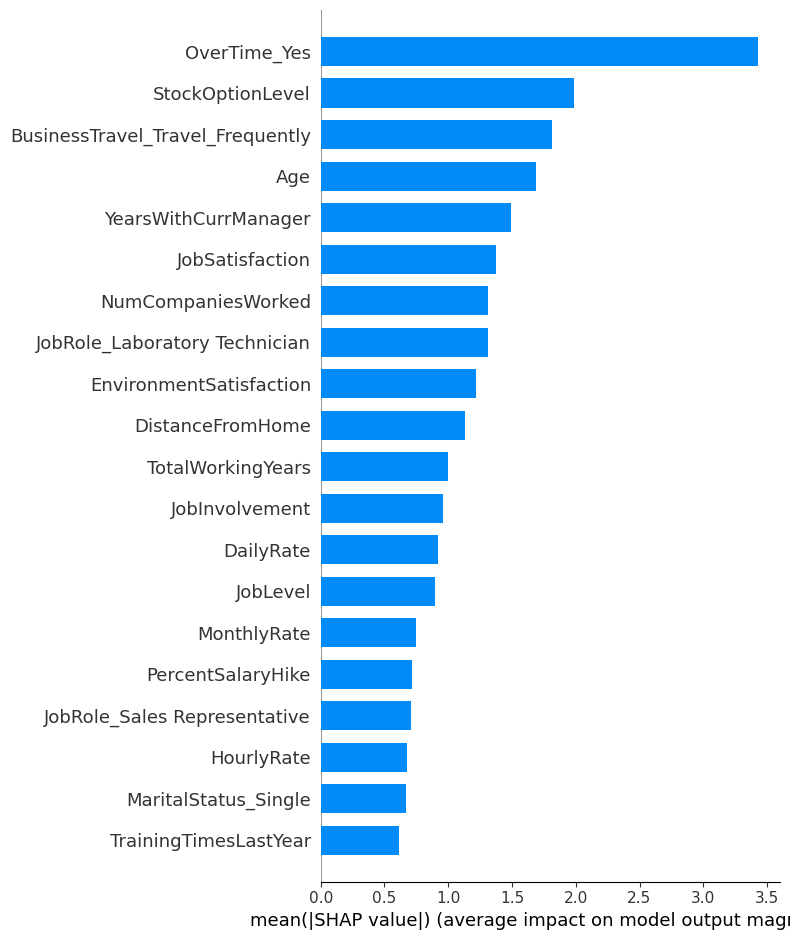

In [41]:
import shap

# Create the explainer and compute SHAP values
explainer = shap.TreeExplainer(models['GradientBoosting'])
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, selected_features, plot_type="bar")



Here are some insights from the feature importance analysis:
* The most important feature is OverTime_Yes, which indicates whether an employee works overtime or not. This could be a strong indicator of job dissatisfaction or stress, which might lead to attrition.
* The StockOptionLevel and BusinessTravel_Travel_Frequently features are also important. The stock option level could be an indicator of job satisfaction and financial stability, while frequent business travel might be associated with job stress.
* Features like JobLevel, Age, and NumCompaniesWorked also have relatively high importance. These could be related to job satisfaction, career progression, and employee stability.


### 7.2 Logistic Regression Model<a class="anchor" id="7.2"></a>

[Back to Table of Contents](#0.1)

In [42]:
# Get feature importance scores
feature_importances = abs(models['LogisticRegression'].coef_[0])

# Display feature importance scores
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                             Feature  Importance
21                      OverTime_Yes    1.528400
4          JobRole_Research Director    1.461778
22      JobRole_Sales Representative    1.308581
18     JobRole_Laboratory Technician    0.775001
9   BusinessTravel_Travel_Frequently    0.730289
6                  TotalWorkingYears    0.644328
10                  StockOptionLevel    0.447355
16                NumCompaniesWorked    0.432582
11           EnvironmentSatisfaction    0.410825
8                    JobSatisfaction    0.398045
15                    JobInvolvement    0.289309
19                               Age    0.226803
20                 PercentSalaryHike    0.225512
7                     YearsAtCompany    0.215299
5                   DistanceFromHome    0.209172
14              MaritalStatus_Single    0.208613
1                           JobLevel    0.201506
13             TrainingTimesLastYear    0.195701
12              YearsWithCurrManager    0.186798
2                   

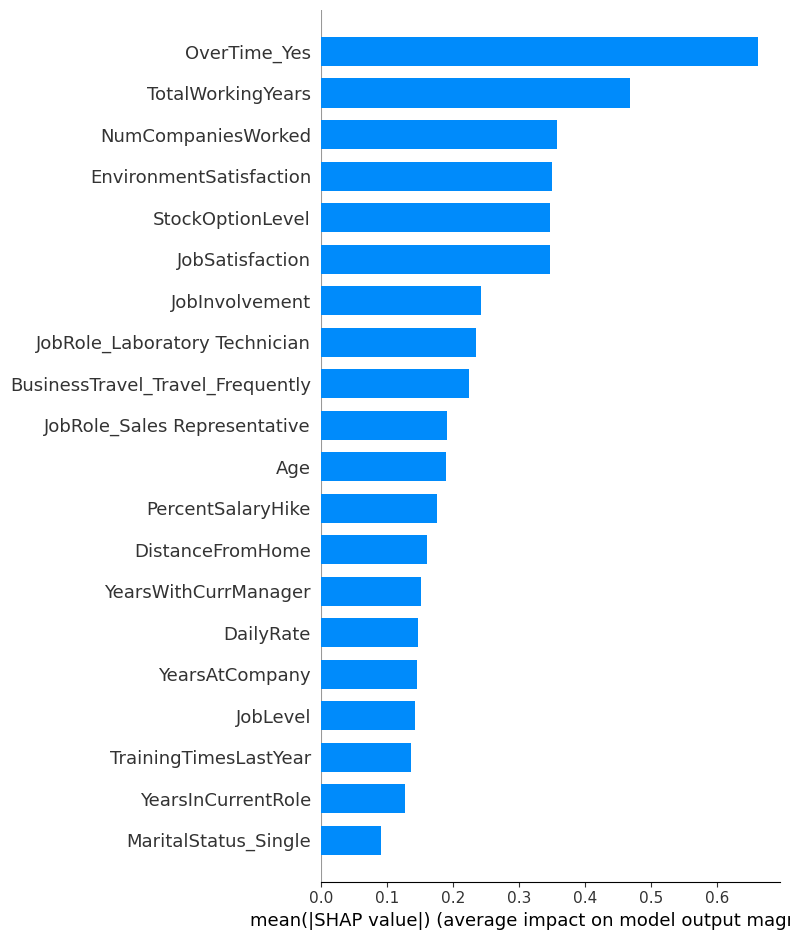

In [44]:
import shap

# Create the explainer and compute SHAP values
explainer = shap.LinearExplainer(models['LogisticRegression'], X_train)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, selected_features, plot_type="bar")



For the Logistic Regression model:

* The OverTime_Yes feature is also the most important here, indicating its significance in predicting attrition.
* The JobRole_Research Director and JobRole_Sales Representative features have high importance. The job role could be associated with job satisfaction, stress levels, and overall employee experience.
* Other important features include JobRole_Laboratory Technician, BusinessTravel_Travel_Frequently, and TotalWorkingYears. These factors could be related to job satisfaction, job stress, and career progression.

In both models, OverTime_Yes is the most important feature, highlighting the significance of overtime work in employee attrition. Additionally, job role and business travel frequency are important factors in both models, indicating their impact on job satisfaction and stress levels.

It is essential to consider these insights when designing employee retention strategies. Addressing issues related to overtime, job role satisfaction, and business travel could help reduce employee attrition.

## 8. Conclusion <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In this project, we analyzed an employee attrition dataset to predict whether an employee is likely to leave the company or not. We started by conducting an exploratory data analysis (EDA) to gain insights into the dataset and to identify any patterns and relationships between the features. We found that features like OverTime, JobRole, and BusinessTravel have significant impacts on employee attrition.

We then performed data preprocessing, which included handling missing values and encoding categorical variables. During feature selection, we used three techniques: univariate statistical tests, feature importance scores, and recursive feature elimination. We selected the most relevant features based on the results of these techniques.

We trained and evaluated several machine learning algorithms for binary classification. We used cross-validation with stratified K-Fold to ensure that the class imbalance in the dataset was taken into account during model evaluation. We used the F1-score as the primary evaluation metric, as it balances both precision and recall.

We selected the top-performing models for hyperparameter tuning to optimize their performance further. We used RandomizedSearch to find the best hyperparameters for each model. After tuning, we evaluated the models on a test set and found that the Logistic Regression model performed well with an F1-score of 0.481.

We also explored techniques to handle imbalanced datasets, such as oversampling with SMOTE and ensemble methods like RUSBoost and EasyEnsemble. These techniques helped improve the performance of some models.

Finally, we analyzed the feature importance scores and partial dependence plots to interpret the models' decision-making processes. We found that OverTime, JobRole, and BusinessTravel were some of the most important features in predicting employee attrition.

In conclusion, this project provided valuable insights into employee attrition and the factors that contribute to it. We developed predictive models that can help identify employees at risk of leaving the company, allowing for timely interventions and retention strategies. By addressing issues like overtime work, job role satisfaction, and business travel frequency, companies can improve employee satisfaction and reduce attrition rates.